In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
DataDir= r"D:\cat-dog\PetImages/"
testDIr=r"D:\cat-dog\test_images"

CATEGORIES=["Dog","Cat"]

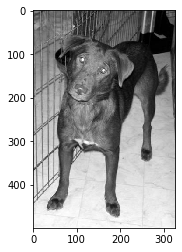

In [3]:
for i in CATEGORIES:
    path=os.path.join(DataDir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

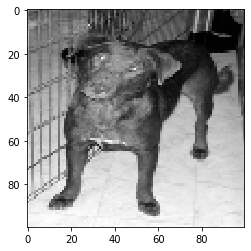

In [4]:
img_size=100

new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [5]:
training_data=[]

def create_training_data():
    for i in CATEGORIES:

        path=os.path.join(DataDir,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            
            except Exception as e:
                pass

In [6]:
create_training_data()
print(len(training_data))

import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample)
    

24918
[array([[214, 217, 219, ..., 191, 185, 104],
       [219, 222, 222, ..., 200, 186, 154],
       [222, 223, 224, ..., 206, 198, 182],
       ...,
       [ 28,  27,  26, ..., 234, 233, 244],
       [130, 131, 143, ..., 245, 243, 238],
       [118, 104, 104, ..., 254, 239, 230]], dtype=uint8), 0]
[array([[139, 175, 187, ..., 153, 148, 140],
       [147, 115, 113, ..., 132, 167, 156],
       [153, 133, 150, ..., 182, 141,  97],
       ...,
       [ 16,  19,  21, ...,  47,  42,  43],
       [135,  28,  24, ...,  54,  65,  68],
       [ 96, 152, 215, ..., 199,  89,  51]], dtype=uint8), 1]
[array([[ 92,  87,  92, ..., 185, 183, 194],
       [ 96,  88,  82, ..., 183, 185, 190],
       [ 95,  88,  83, ..., 182, 184, 185],
       ...,
       [165, 161, 166, ...,  65,  67,  78],
       [155, 146, 148, ...,  48,  63,  83],
       [138, 130, 134, ...,  62,  58,  77]], dtype=uint8), 1]
[array([[170, 172, 173, ..., 179, 175, 184],
       [170, 173, 168, ..., 179, 180, 185],
       [164, 173, 16

In [7]:
X=[]
y=[]  

for features,label in training_data:
    X.append(features)
    y.append(label)
    
    
print(X[0].reshape(-1,img_size,img_size,1))


X=np.array(X).reshape (-1,img_size,img_size,1)

[[[[214]
   [217]
   [219]
   ...
   [191]
   [185]
   [104]]

  [[219]
   [222]
   [222]
   ...
   [200]
   [186]
   [154]]

  [[222]
   [223]
   [224]
   ...
   [206]
   [198]
   [182]]

  ...

  [[ 28]
   [ 27]
   [ 26]
   ...
   [234]
   [233]
   [244]]

  [[130]
   [131]
   [143]
   ...
   [245]
   [243]
   [238]]

  [[118]
   [104]
   [104]
   ...
   [254]
   [239]
   [230]]]]


In [9]:
import pickle

pickle_out=open("D:\cat-dog\X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("D:\cat-dog\y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close() 